<a href="https://colab.research.google.com/github/PrzemyslawTrabuc/Diabetes_Predict/blob/main/zad3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Przemysław Trabuć, Rok V, Informatyka**

## **Wczytanie danych**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import files
uploaded = files.upload()

Saving diabetes3.csv to diabetes3.csv


In [ ]:
diabetes_data = pd.read_csv('diabetes3.csv', na_values=['NA mg/dl', "NA"])
#print(diabetes_data[200:250])
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148 mg/dl,72.0,35.0,0.0,33.6,0.627,50,1.0
1,1,85 mg/dl,66.0,29.0,0.0,26.6,0.351,31,0.0
2,8,183 mg/dl,64.0,0.0,0.0,23.3,0.672,32,1.0
3,1,89 mg/dl,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0,137 mg/dl,40.0,35.0,168.0,43.1,2.288,33,1.0


# **Wyszukanie i rozwiązanie problemów z danymi**

Usunięcie dopisku 'mg/dl' z kolumny Glucose

In [ ]:
diabetes_data['glucose_trim'] = diabetes_data['Glucose'].str.strip(" mg/dl")
print(diabetes_data[['Glucose','glucose_trim']].head())
diabetes_data['Glucose'] = diabetes_data['glucose_trim']
cols_to_drop=['glucose_trim']
diabetes_data = diabetes_data.drop(cols_to_drop,axis = 1)
diabetes_data.head()

     Glucose glucose_trim
0  148 mg/dl          148
1   85 mg/dl           85
2  183 mg/dl          183
3   89 mg/dl           89
4  137 mg/dl          137


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.0,0.0,33.6,0.627,50,1.0
1,1,85,66.0,29.0,0.0,26.6,0.351,31,0.0
2,8,183,64.0,0.0,0.0,23.3,0.672,32,1.0
3,1,89,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0,137,40.0,35.0,168.0,43.1,2.288,33,1.0


Znalezienie i usunięcie duplikatów

In [ ]:
column_names = diabetes_data.columns
counter = diabetes_data[column_names].isnull().sum()
print (counter)

duplicated_rows= diabetes_data[diabetes_data.duplicated()]
print(duplicated_rows)
#diabetes_data = pd.read_csv('diabetes3.csv')
#diabetes_data.describe()

Pregnancies                  0
Glucose                     11
BloodPressure               11
SkinThickness               11
Insulin                     22
BMI                         11
DiabetesPedigreeFunction    11
Age                          0
Outcome                     11
dtype: int64
     Pregnancies Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
220            6     NaN           68.0  ...                       NaN   32      NaN
221            6     NaN           68.0  ...                       NaN   32      NaN
227            4     136            NaN  ...                     1.182   22      1.0
228            4     136            NaN  ...                     1.182   22      1.0
248            6     NaN           68.0  ...                       NaN   32      NaN
249            6     NaN           68.0  ...                       NaN   32      NaN
275            6     NaN           68.0  ...                       NaN   32      NaN
314            4     136    

In [ ]:
for col in diabetes_data.columns:
    missing = diabetes_data[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        diabetes_data['{}_ismissing'.format(col)] = missing

ismissing_cols = [col for col in diabetes_data.columns if 'ismissing' in col]
diabetes_data['num_missing'] = diabetes_data[ismissing_cols].sum(axis=1)


# drop rows with a lot of missing values.
ind_missing = diabetes_data[diabetes_data['num_missing'] > 0].index

diabetes_data = diabetes_data.drop(ind_missing, axis=0)


created missing indicator for: Glucose
created missing indicator for: BloodPressure
created missing indicator for: SkinThickness
created missing indicator for: Insulin
created missing indicator for: BMI
created missing indicator for: DiabetesPedigreeFunction
created missing indicator for: Outcome


In [ ]:
column_names = diabetes_data.columns
counter = diabetes_data[column_names].isnull().sum()
print (counter)

Pregnancies                           0
Glucose                               0
BloodPressure                         0
SkinThickness                         0
Insulin                               0
BMI                                   0
DiabetesPedigreeFunction              0
Age                                   0
Outcome                               0
Glucose_ismissing                     0
BloodPressure_ismissing               0
SkinThickness_ismissing               0
Insulin_ismissing                     0
BMI_ismissing                         0
DiabetesPedigreeFunction_ismissing    0
Outcome_ismissing                     0
num_missing                           0
dtype: int64


Usunięcie kolumn pomocniczych

In [ ]:
cols_to_drop = ['BloodPressure_ismissing','SkinThickness_ismissing','SkinThickness_ismissing','Insulin_ismissing','BMI_ismissing','DiabetesPedigreeFunction_ismissing','Outcome_ismissing','num_missing', 'Glucose_ismissing']
diabetes_data = diabetes_data.drop(cols_to_drop, axis=1)
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.0,0.0,33.6,0.627,50,1.0
1,1,85,66.0,29.0,0.0,26.6,0.351,31,0.0
2,8,183,64.0,0.0,0.0,23.3,0.672,32,1.0
3,1,89,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0,137,40.0,35.0,168.0,43.1,2.288,33,1.0


Sprawdzenie czy nie zostały żadne duplikaty

In [ ]:
duplicated_rows= diabetes_data[diabetes_data.duplicated()]
print(duplicated_rows)

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


Konwersja wszystkich wartości na numeryczne

In [ ]:
diabetes_data['Glucose'] = pd.to_numeric(diabetes_data['Glucose'])
diabetes_data['Pregnancies'] = pd.to_numeric(diabetes_data['Pregnancies'])
diabetes_data['BloodPressure'] = pd.to_numeric(diabetes_data['BloodPressure'])
diabetes_data['SkinThickness'] = pd.to_numeric(diabetes_data['SkinThickness'])
diabetes_data['Insulin'] = pd.to_numeric(diabetes_data['Insulin'])
diabetes_data['DiabetesPedigreeFunction'] = pd.to_numeric(diabetes_data['DiabetesPedigreeFunction'])
diabetes_data['Age'] = pd.to_numeric(diabetes_data['Age'])
diabetes_data['Outcome'] = pd.to_numeric(diabetes_data['Outcome'])

In [ ]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Jak widać w kilku miejscach znajdują się minimlane wartości równe 0, należy się przy tym zastnowić czy są one możliwe. Takie wartości jak cisnienie krwi, glukoza, insulina czy bmi nie mogą być zerowe, dlatego wiersze w kotrych się zawierają zostaną usunięte

In [ ]:
#diabetes_data.loc[diabetes_data['BloodPressure'] < 40, 'BloodPressure'] = 0

In [ ]:
diabetes_data = diabetes_data[diabetes_data['Glucose'] != 0]
diabetes_data = diabetes_data[diabetes_data['BMI'] != 0]
diabetes_data = diabetes_data[diabetes_data['BloodPressure'] != 0]
diabetes_data = diabetes_data[diabetes_data['SkinThickness'] != 0]
diabetes_data = diabetes_data[diabetes_data['Insulin'] != 0]


Po usunięciu, wartości stały się bardziej realistyczne

In [ ]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
print(diabetes_data)

     Pregnancies  Glucose  ...  Age  Outcome
0              6      148  ...   50      1.0
1              1       85  ...   31      0.0
2              8      183  ...   32      1.0
3              1       89  ...   21      0.0
4              0      137  ...   33      1.0
..           ...      ...  ...  ...      ...
783           10      101  ...   63      0.0
785            2      122  ...   27      0.0
786            5      121  ...   30      0.0
787            1      126  ...   47      1.0
789            1       93  ...   23      0.0

[768 rows x 9 columns]


#**Macierz rozproszenia wykresy**

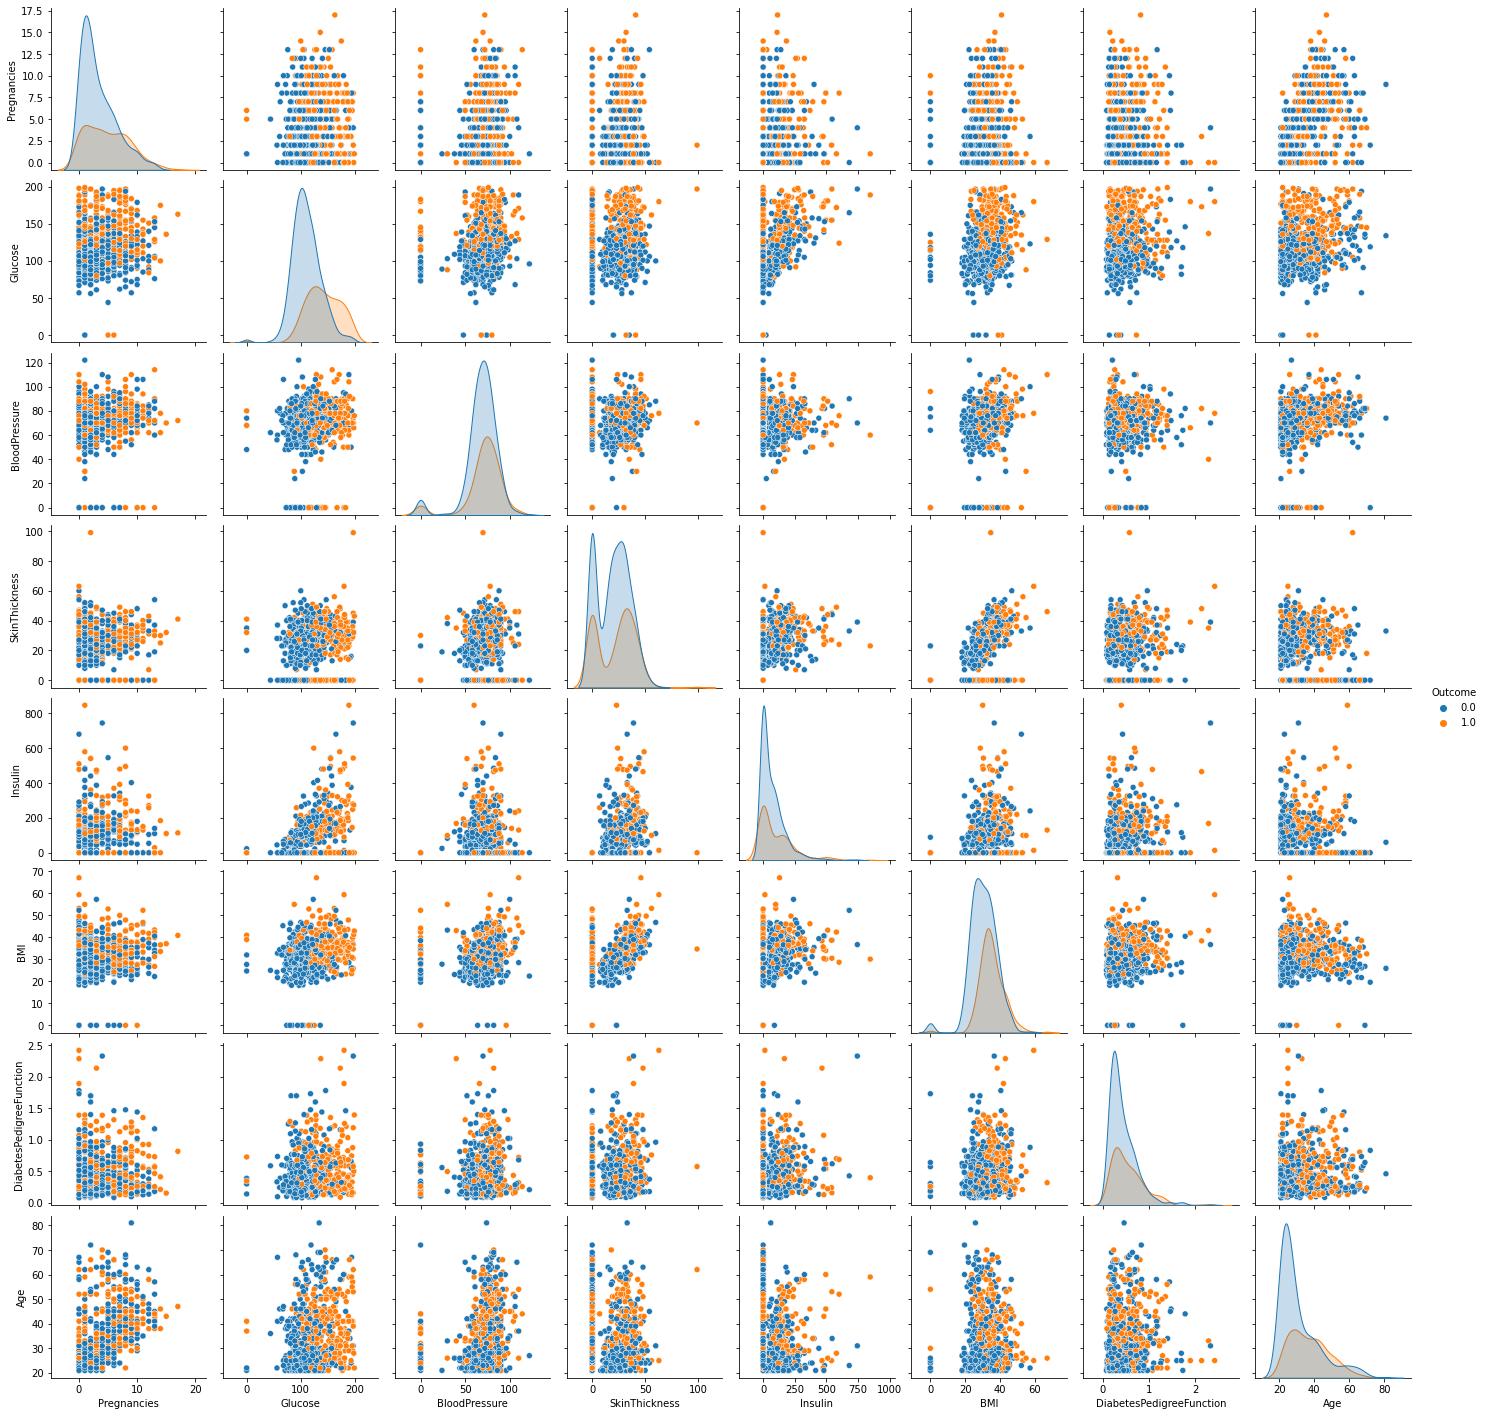

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

# We have to temporarily drop the rows with 'NA' values
# because the Seaborn plotting function does not know
# what to do with them
sb.pairplot(diabetes_data, hue="Outcome");
#sb.pairplot(diabetes_data, hue="Outcome", diag_kind="hist");

#**Krótka analiza EDA**



Sprawdzenie liczebności wartości wykresami histplot

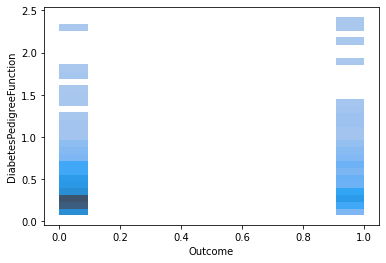

In [ ]:
#sns.histplot(x='Age',data=diabetes_data)
#sns.histplot(x='BMI',data=diabetes_data)
#sns.histplot(x='Insulin',data=diabetes_data)
#sns.histplot(x='Pregnancies',data=diabetes_data)
#sns.histplot(x='Glucose',data=diabetes_data)
#sns.histplot(x='BloodPressure',data=diabetes_data)
#sns.histplot(x='SkinThickness',data=diabetes_data)
#sns.histplot(x='DiabetesPedigreeFunction',data=diabetes_data)
sns.histplot(x='Outcome', y='DiabetesPedigreeFunction', data=diabetes_data)


Wykres Violinowy do zbadania korelacji między wartościami a wynikiem Outcome.

Z wykresu można odczytać, że największy wpływ na wynik ma poziom glukozy, BMI i liczbą ciąż

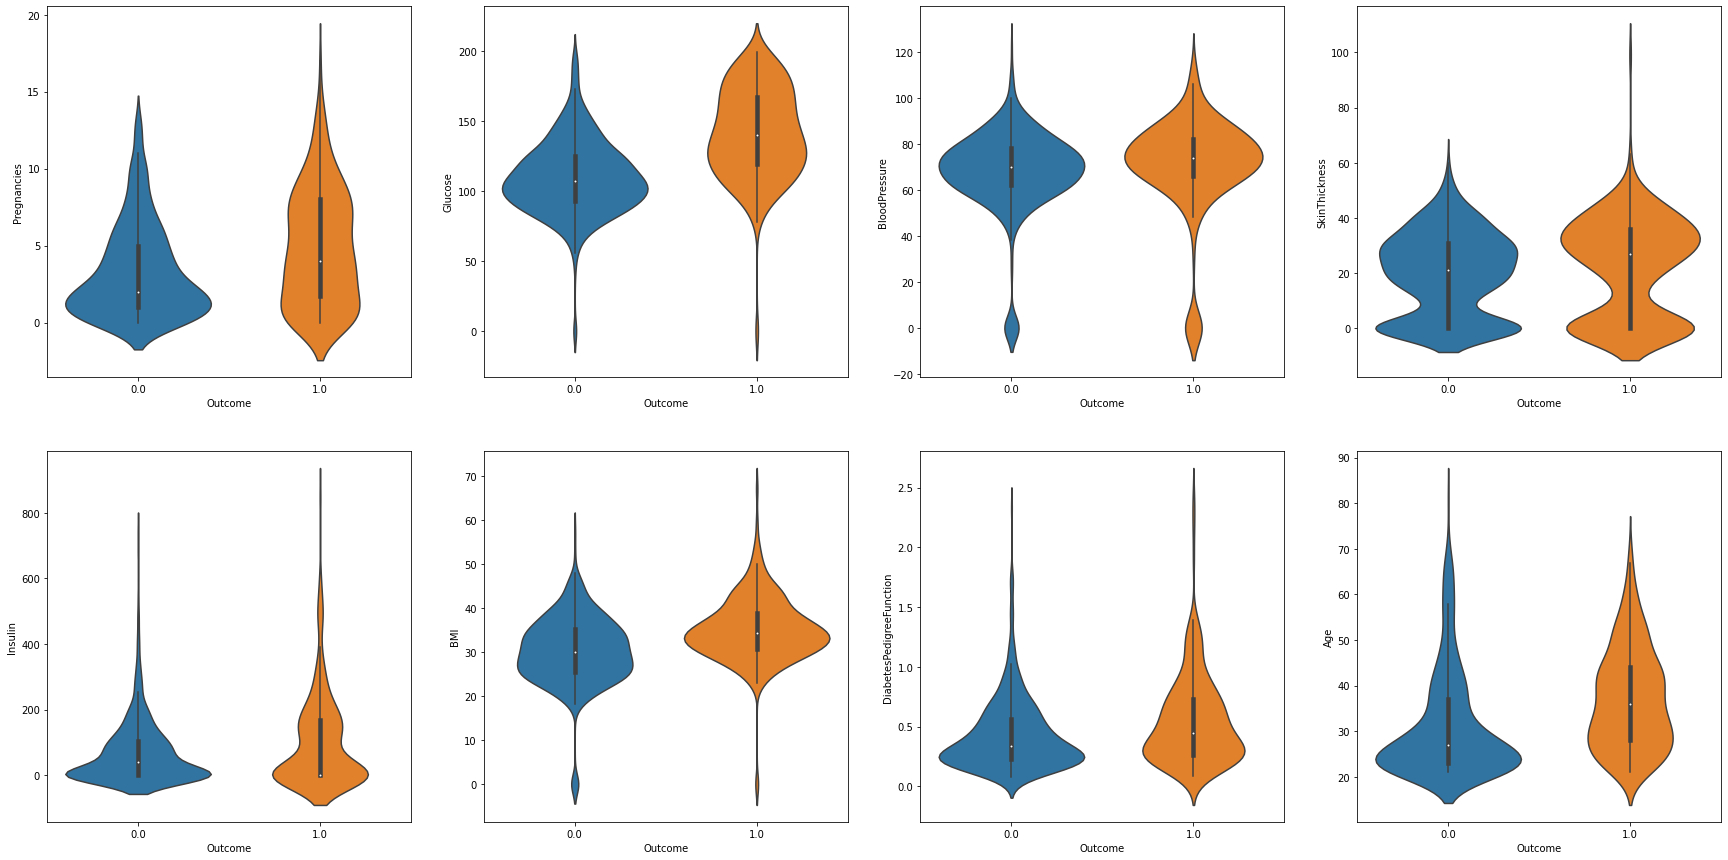

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(figsize=(30, 15))

for column_index, column in enumerate(diabetes_data.columns):
    if column == 'Outcome':
        continue
    plt.subplot(2, 4, column_index +1)
    sb.violinplot(x='Outcome', y=column, data=diabetes_data)

#**Budowa Klasyfikatorów**



In [ ]:
#iris_data_clean = pd.read_csv('iris-data-clean.csv')

# We're using all four measurements as inputs
# Note that scikit-learn expects each entry to be a list of values, e.g.,
# [ [val1, val2, val3],
#   [val1, val2, val3],
#   ... ]
# such that our input data set is represented as a list of lists

# We can extract the data in this format from pandas like this:
all_inputs = diabetes_data[['Pregnancies',
                            'Glucose',	
                            'BloodPressure',
                            'SkinThickness',	
                            'Insulin',
                          	'BMI', 
                            'DiabetesPedigreeFunction',
                            'Age']].values

# Similarly, we can extract the class labels
all_labels = diabetes_data['Outcome'].values

# Make sure that you don't mix up the order of the entries
# all_inputs[5] inputs should correspond to the class in all_labels[5]

# Here's what a subset of our inputs looks like:
all_inputs[:5]

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01]])

Dzielimy dane na dwa zbiory:

In [ ]:
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)

print(training_inputs.size)
print(testing_inputs.size)
print(testing_inputs.size/(testing_inputs.size+training_inputs.size))

4608
1536
0.25


#**Drzewa decyzyjne (Decision Tree)**



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(testing_inputs, testing_classes)

0.71875

Nasz model osiąga ponad 97% dokładności klasyfikacji bez większego wysiłku.

Jest jednak pewien haczyk: w zależności od sposobu próbkowania naszego zestawu treningowego i testowego nasz model może osiągnąć od 80% do 100% dokładności:

(array([  2.,  13.,  38., 119., 206., 255., 208., 105.,  46.,   8.]),
 array([0.58333333, 0.6046875 , 0.62604167, 0.64739583, 0.66875   ,
        0.69010417, 0.71145833, 0.7328125 , 0.75416667, 0.77552083,
        0.796875  ]),
 <a list of 10 Patch objects>)

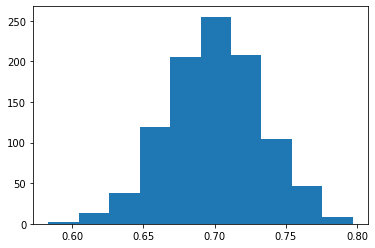

In [ ]:
model_accuracies = []

for repetition in range(1000):


    #Dzielimy Dataset
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)
    
    #Uczymy model
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
    #I tak 1000 razy

plt.hist(model_accuracies, bins=10)

**Walidacja krzyżowa (k-fold Cross-validation)**

Ten problem jest głównym powodem, dla którego większość analityków danych przeprowadza k-krotną weryfikację krzyżową swoich modeli wg schematu: podziel oryginalny zbiór danych na k podzbiorów, użyj jednego z podzbiorów jako zestawu testowego, a pozostałe podzbiory są używane jako zestaw treningowy. Ten proces jest następnie powtarzany k razy tak, że każdy podzbiór jest używany jako zestaw testowy dokładnie raz.

10-krotna weryfikacja krzyżowa jest najczęstszym wyborem, więc użyjmy tego tutaj. Wykonywanie 10-krotnej weryfikacji krzyżowej na naszym zestawie danych wygląda mniej więcej tak:

(każdy kwadrat jest wpisem w naszym zestawie danych)

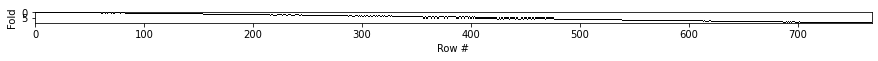

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

def plot_cv(cv, features, labels):
    masks = []
    for train, test in cv.split(features, labels):
        mask = np.zeros(len(labels), dtype=bool)
        mask[test] = 1
        masks.append(mask)
    
    plt.figure(figsize=(15, 15))
    plt.imshow(masks, interpolation='none', cmap='gray_r')
    plt.ylabel('Fold')
    plt.xlabel('Row #')

plot_cv(StratifiedKFold(n_splits=10), all_inputs, all_labels)

W powyższym kodzie użyliśmy weryfikacji krzyżowej **Stratified k-fold**. Stratyfikowany k-fold utrzymuje te same proporcje klas we wszystkich podzbiorach, co jest niezbędne do zachowania reprezentatywnego podzbioru naszego zbioru danych. (np. abyśmy nie mieli 100% Iris setosa w jednej z grup).

Możemy przeprowadzić 10-krotną weryfikację krzyżową naszego modelu za pomocą następującego kodu:

Scores: [0.63461538 0.76923077 0.71153846 0.74509804 0.64705882 0.58823529
 0.66666667 0.78431373 0.70588235 0.76470588 0.70588235 0.80392157
 0.66666667 0.7254902  0.80392157]


Text(0.5, 1.0, 'Average score: 0.715')

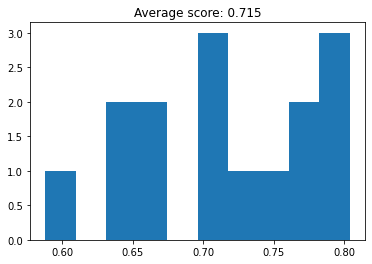

In [ ]:
from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=15)
print('Scores: %s' % cv_scores)
plt.hist(cv_scores)
plt.title('Average score: {:.3f}'.format(np.mean(cv_scores)))

#**Strojenie 2 hiperparametrów**

Najlepsze efekty, zostały uzyskane dzięki wystrojeniu następujących dwóch parametrów: 'criterion', 'max depth'.

In [ ]:
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'max_depth': [1, 2, 3, 4, 5,6,7],
                 }

#cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

NameError: ignored

Teraz zwizualizujmy wyniki:

Text(33.0, 0.5, 'max_depth')

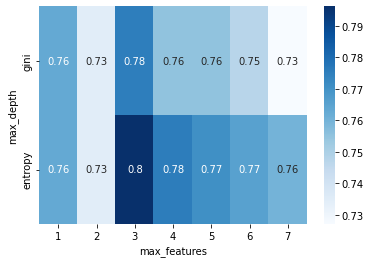

In [ ]:
grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (2, 7)
sb.heatmap(grid_visualization, cmap='Blues', annot=True)
plt.xticks(np.arange(7) + 0.5, grid_search.param_grid['max_depth'])
plt.yticks(np.arange(2) + 0.5, grid_search.param_grid['criterion'])
plt.xlabel('max_features')
plt.ylabel('max_depth')

Teraz możemy wybrać najlepszy klasyfikator z wyszukiwania siatki i użyć go:

In [ ]:
decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(criterion='entropy', max_depth=3)

(array([  2.,   1.,   8.,  38., 104., 217., 254., 231., 121.,  24.]),
 array([0.57142857, 0.60204082, 0.63265306, 0.66326531, 0.69387755,
        0.7244898 , 0.75510204, 0.78571429, 0.81632653, 0.84693878,
        0.87755102]),
 <a list of 10 Patch objects>)

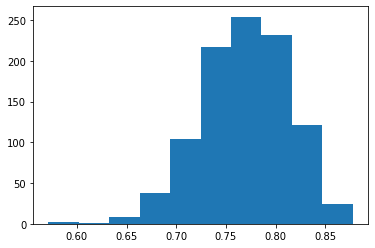

In [ ]:
model_accuracies = []

for repetition in range(1000):


    #Dzielimy Dataset
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)
    
    #Uczymy model
    decision_tree_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3)
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
    #I tak 1000 razy

plt.hist(model_accuracies, bins=10)

#**Wizualizacja drzewa**

In [ ]:
#Instalacja wymaganych komponentów
!pip install graphviz
!pip install six
!pip install pydotplus

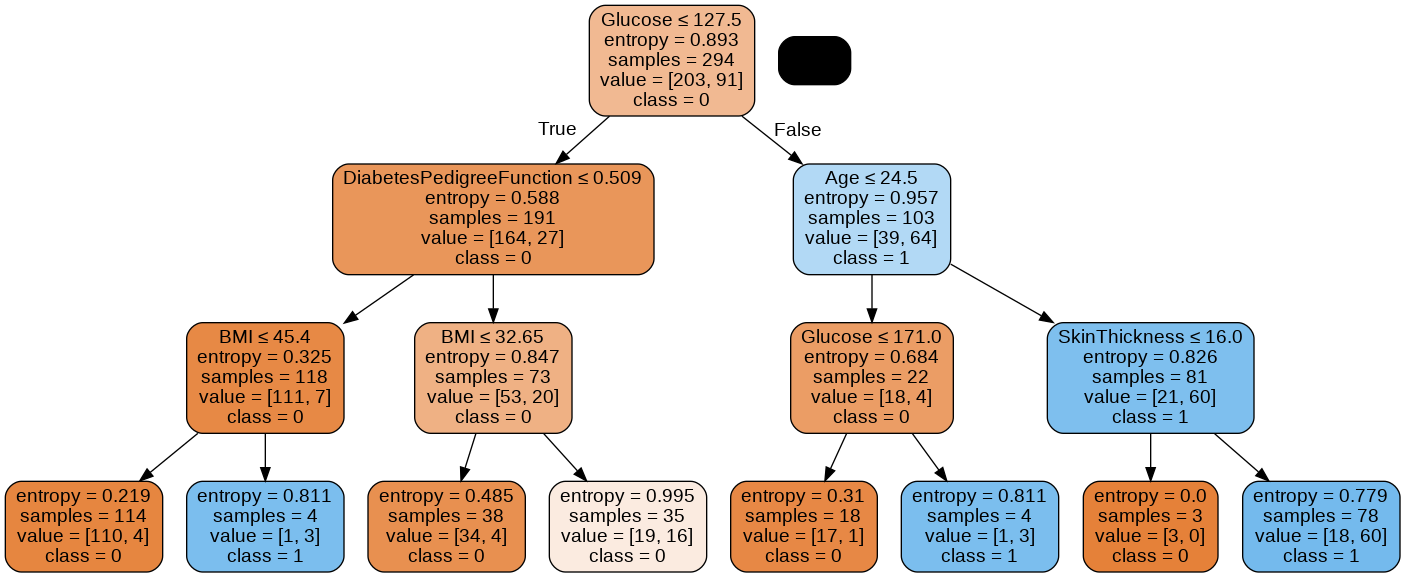

In [ ]:
from six import StringIO
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
feature_cols = ['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age']
class_names = ['0','1']

dot_data = StringIO()
export_graphviz(decision_tree_classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols, class_names=class_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_data.png')
Image(graph.create_png())

#**Prezentacja działania rozwiązania**
Jak widać skuteczność waha się od ok 77 do 83%

[0.7        0.8        0.76923077 0.69230769 0.84615385 0.87179487
 0.82051282 0.82051282 0.76923077 0.87179487]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


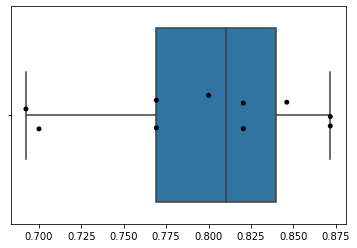

In [ ]:
dt_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
print(dt_scores)
sb.boxplot(dt_scores)
sb.stripplot(dt_scores, jitter=True, color='black')

## **Porównanie z drugim algorytmem (Extra Tree Classifier)**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

extra_tree_classifier = ExtraTreesClassifier()

parameter_grid = {'n_estimators': [10, 25, 50, 100],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [1, 2, 3, 4, 5, 6, 7,8]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(extra_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_
extra_tree_classifier = grid_search.best_estimator_

Best score: 0.8035897435897436
Best parameters: {'criterion': 'entropy', 'max_features': 5, 'n_estimators': 10}


Oba modele cechują się zbliżonym poziomem skuteczności jednak Extra Tree zdaje się cechować minimalnie lepszą skutecznością

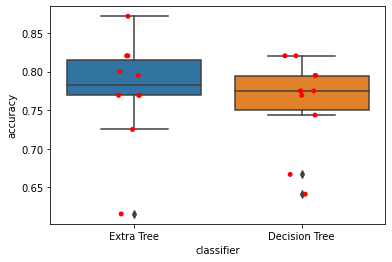

In [ ]:
extra_tree_classifier = grid_search.best_estimator_
decision_tree_classifier = grid_search.best_estimator_


rf_df = pd.DataFrame({'accuracy': cross_val_score(extra_tree_classifier, all_inputs, all_labels, cv=10),
                       'classifier': ['Extra Tree'] * 10})
dt_df = pd.DataFrame({'accuracy': cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10),
                      'classifier': ['Decision Tree'] * 10})
both_df = rf_df.append(dt_df)

sb.boxplot(x='classifier', y='accuracy', data=both_df)
sb.stripplot(x='classifier', y='accuracy', data=both_df, jitter=True, color='red')

# **Przedstawienie działania modelu**
Z wykorzystnaiem Extra Tree Classfier ze względu na wstępnie określoną wyższą skuteczność



[  6.    103.     72.     32.    190.     37.7    55.      0.324]	-->	1.0	(Actual: 0.0)
[  2.    108.     62.     32.     56.     25.2    21.      0.128]	-->	0.0	(Actual: 0.0)
[  5.    108.     72.     43.     75.     36.1    33.      0.263]	-->	0.0	(Actual: 0.0)
[  5.    121.     72.     23.    112.     26.2    30.      0.245]	-->	0.0	(Actual: 0.0)
[  0.     95.     64.     39.    105.     44.6    22.      0.366]	-->	0.0	(Actual: 0.0)
[9.00e+00 1.24e+02 7.00e+01 3.30e+01 4.02e+02 3.54e+01 3.40e+01 2.82e-01]	-->	1.0	(Actual: 0.0)
[  9.    145.     80.     46.    130.     37.9    40.      0.637]	-->	1.0	(Actual: 1.0)
[  8.    186.     90.     35.    225.     34.5    37.      0.423]	-->	1.0	(Actual: 1.0)
[ 1.    88.    62.    24.    44.    29.9   23.     0.422]	-->	0.0	(Actual: 0.0)
[  1.    149.     68.     29.    127.     29.3    42.      0.349]	-->	0.0	(Actual: 1.0)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


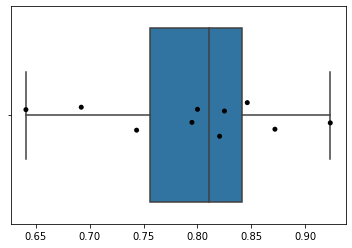

In [ ]:
 %matplotlib inline
import pandas as pd
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# We know that our data set should have no missing measurements
#assert len(iris_data_clean.loc[(iris_data_clean['sepal_length_cm'].isnull()) |
  #                             (iris_data_clean['sepal_width_cm'].isnull()) |
   #                            (iris_data_clean['petal_length_cm'].isnull()) |
    #                           (iris_data_clean['petal_width_cm'].isnull())]) == 0

all_inputs = diabetes_data[['Pregnancies','Glucose', 'BloodPressure',	'SkinThickness',	'Insulin',	'BMI', 'Age','DiabetesPedigreeFunction']].values

all_labels = diabetes_data['Outcome'].values

# This is the classifier that came out of Grid Search

extra_tree_classifier = RandomForestClassifier(criterion='gini', max_features=5, n_estimators=10)
#decision_tree_classifier = DecisionTreeClassifier(max_depth=4, max_features=4, splitter='best', criterion='entropy')

# All that's left to do now is plot the cross-validation scores
rf_classifier_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
sb.boxplot(rf_classifier_scores)
sb.stripplot(rf_classifier_scores, jitter=True, color='black')

# ...and show some of the predictions from the classifier
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)

decision_tree_classifier.fit(training_inputs, training_classes)

for input_features, prediction, actual in zip(testing_inputs[:10],
                                              decision_tree_classifier.predict(testing_inputs[:10]),
                                              testing_classes[:10]):
    print('{}\t-->\t{}\t(Actual: {})'.format(input_features, prediction, actual))

## **Podsumowanie**

Zbudowano dwa modele, oba oscylujące w skuteczności około 80%, jednak jest to za mało by model mógł zostać wykorzystany w przyszłości do celów medycznych. Model można wykorzystać do pokazania ludziom jakie czynniki mogą wpłynąc na zwiększe szans zachorowania na cukrzycę.